In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
from scipy.sparse import identity
from scipy import sparse
import matplotlib.pyplot as plt
from numpy import linalg as LA


from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


Poisson solver for 2d-Poisson equation:

\begin{align}
\frac{\partial u(x,y)}{\partial x} + \frac{\partial u(x,y)}{\partial y} = -\sin(\pi x) \cdot \sin(\pi y)
\end{align}
With analytical solution given by:

\begin{align}
u(x,y) = -\frac{1}{2 \pi^2}\sin(\pi x) \cdot \sin(\pi y)
\end{align}
and
\begin{align}
u(x,y) = 0
\end{align}
at the boundaries.

In [15]:
def twoD_Poisson(k):
    
    # Set-up of the grid
    N = 2**k
    h = 1/N
    x = np.arange(h, 1, h)
    X,Y = np.meshgrid(x,x) 
    # Define RHS through given function
    b = (-np.sin(np.pi*X)*np.sin(np.pi*Y)).flatten()
    # Analytical solution
    ana = ((np.sin(np.pi*X)*np.sin(np.pi*Y))/(-2*np.pi*np.pi)).flatten()
    # Construct Matrices
    FD = (1/h**2)*diags([-1., 2., -1.], [-1, 0, 1], shape=(N-1, N-1))
    ID = identity(N-1, dtype='Float64')
    #Solve System using Kroneker trick
    A = sparse.kron(FD,ID) + sparse.kron(ID, FD)
    sol = spsolve(A,b)
    #Computer Error
    err = LA.norm(ana-sol)/np.sqrt(len(sol))

    return err, sol.reshape(X.shape), X, Y

In [38]:
err, sol, X, Y = twoD_Poisson(7)

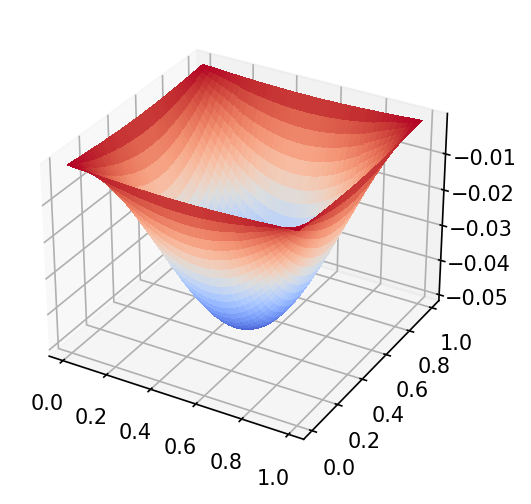

In [40]:
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, sol, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [98]:
# errors = [get_error(i) for i in range(5,11) ]

In [22]:
import time

t0 = time.time()
err = twoD_Poisson(6)
t1 = time.time()

total = t1-t0

In [35]:
times = np.zeros(7)
for i in range(3,10):
    t0 = time.time()
    err = twoD_Poisson(i)
    t1 = time.time()

    total = t1-t0
    times[i-3] = total

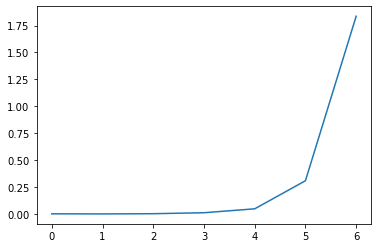

In [36]:
import matplotlib.pyplot as plt
plt.plot(times)